In [0]:
import numpy as np

import torch
from torch import  nn
from torchvision import datasets, transforms
import torch.nn.functional as F

import matplotlib.pyplot as plt 

In [2]:
transform = transforms.Compose([transforms.Resize((28,28)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,))
                               ])

training_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
val_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

training_loader = torch.utils.data.DataLoader(training_dataset, batch_size = 100, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size = 100, shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:00, 27290613.20it/s]                            


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 432585.66it/s]
  1%|          | 16384/1648877 [00:00<00:11, 144391.10it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 4297568.18it/s]                            
8192it [00:00, 181708.15it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [0]:
def im_convert(tensor):
  image = tensor.clone().detach().numpy()
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.5 , 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
  image = image.clip(0,1)
  
  return image

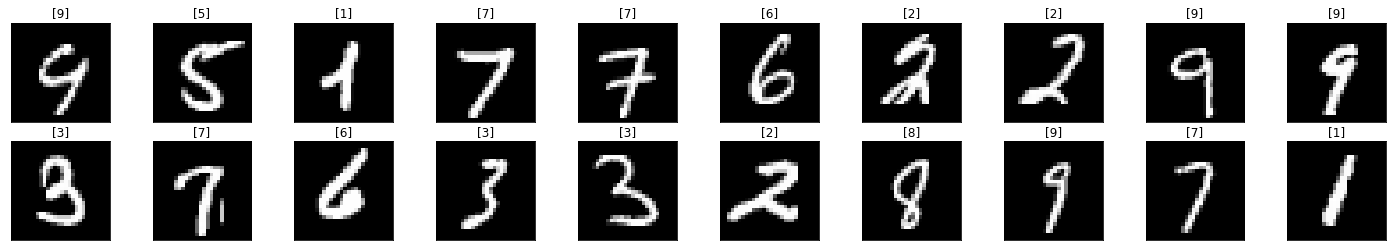

In [4]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title([labels[idx].item()])

In [0]:
# Creating Model

class Classifier(nn.Module):
  def __init__(self, D_in, H1, H2, D_out):
    super().__init__()
    self.linear1 = nn.Linear(D_in, H1)
    self.linear2 = nn.Linear(H1, H2)
    self.linear3 = nn.Linear(H2, D_out)
  
  def forward(self, x):
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    x = self.linear3(x)
    
    return x
  

In [6]:
model = Classifier(784, 125, 65, 10)
model

Classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [12]:

epochs = 15
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []



for epoch in range(epochs):
  running_loss =  0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0
 
  
  for inputs, labels in training_loader:
    inputs = inputs.view(inputs.shape[0], -1)
    #inputs, labels = data
    outputs = model(inputs)
    
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    _, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)
    
  else:
    with torch.no_grad():
      for val_inputs, val_labels in val_loader:
        val_inputs = val_inputs.view(val_inputs.shape[0], -1)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        
        _, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(val_preds == val_labels.data)
      
    epoch_loss = running_loss/len(training_loader)
    epoch_acc = running_corrects.float()/ len(training_loader)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)
    
    val_epoch_loss = val_running_loss/len(val_loader)
    val_epoch_acc = val_running_corrects.float()/ len(val_loader)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)
    
    print('epoch :', (epoch+1))
    print('training loss: {:.4f}, acc {:.4f} '.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, validation acc {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()))    
    
    
 
    

epoch : 1
training loss: 0.0829, acc 97.6350 
validation loss: 0.1286, validation acc 96.8400 
epoch : 2
training loss: 0.0682, acc 97.9333 
validation loss: 0.1279, validation acc 96.8200 
epoch : 3
training loss: 0.0624, acc 98.1517 
validation loss: 0.1233, validation acc 96.9000 
epoch : 4
training loss: 0.0593, acc 98.1983 
validation loss: 0.1257, validation acc 96.9600 
epoch : 5
training loss: 0.0566, acc 98.2783 
validation loss: 0.1283, validation acc 97.0100 
epoch : 6
training loss: 0.0539, acc 98.3433 
validation loss: 0.1361, validation acc 96.8200 
epoch : 7
training loss: 0.0522, acc 98.3883 
validation loss: 0.1323, validation acc 96.9000 
epoch : 8
training loss: 0.0511, acc 98.4033 
validation loss: 0.1318, validation acc 96.9300 
epoch : 9
training loss: 0.0492, acc 98.4750 
validation loss: 0.1355, validation acc 96.9400 
epoch : 10
training loss: 0.0478, acc 98.5100 
validation loss: 0.1415, validation acc 96.9900 
epoch : 11
training loss: 0.0463, acc 98.5217 
va

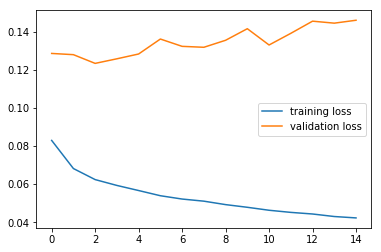

In [13]:
plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='validation loss')
plt.legend()